# Daisy World


## Introduction

In this notebook, we follow on from [01 Simple Earth System Model](01-Simple_Earth_System_Model.ipynb) and create another simple Earth System model that illustrates the role of feedback. This is based on the [Watson and Lovelock's (1983)](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0889.1983.tb00031.x) paper "Biological homeostasis of the global environment: the parable of Daisyworld". As with the previous examnple, you should not take this model literally as an expression of a climate model, but you should be able to use it to better appreciate and explain the ideas behind negative feedback in such a system. 

Before starting the practical, you should read the [Watson and Lovelock paper](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0889.1983.tb00031.x) and watch this video:


[![NASA Daisy World](http://img.youtube.com/vi/sCxIqgZA7ag/0.jpg)](http://www.youtube.com/watch?v=sCxIqgZA7ag "Daisy World")


## Daisy World code


### Global temperature 

We start by developing our model function `my_first_earth_system(albedo,Jin)` from the [previous exercise](01-Simple_Earth_System_Model.ipynb).

In  equation 4 of [Watson and Lovelock](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0889.1983.tb00031.x) they use the term `S` as the solar radiation flux, and `L` as a 'luminosity' variable. As with our previous model, we ignore any geometric effects.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def global_T(albedo,area,L=1.0,S=917.0):
    '''
    A simple earth system model to give the effective
    planetary temperature (C).
    
    Function takes as input the daisy albedo (unitless) 
    array, the proportionate area of each, 
    and the incoming solar radiation S (in Wm^{-2})
    and luminosity L. Returns the effective
    temperature of the planet (in degrees C).
    
    Inputs:
    
    albedo : float array of length n_species + 1
             (unitless, 0<=albedo<=1). The final entry is
             for bare ground.
    area   : float array of length n_species + 1
             proportionate area of ground 
             covered by each species. The last entry 
             is for bare ground. This should
             sum to p
             
    Keywords:
    
    L           : Luminosity (unitless, 0<=L<=1)  
    S           : Solar radiation flux density (Wm^{-2})
    
    Returns:
    
    Te          : effective planetary temperature
    '''
    # A is planetary albedo (eqn 5)
    A = (albedo * area).sum()
    
    # Get effective temperature Te (eqn 4)
    # Stefan-Boltzmann constant 𝐽𝑠−1𝑚−2𝑇−4
    sigma = 5.670400e-8
    Jout = S*L*(1-A)
    Te = (Jout/sigma)**(1/4.)
    # return temperature in C 
    return Te-273

As before, we can plot this, to conform expected behaviour, for instance, as a function of albedo:

(0.0, 1.0)

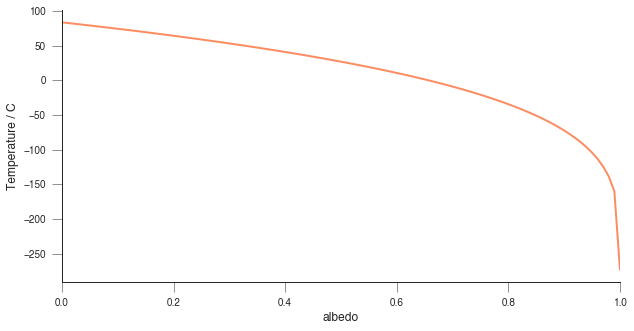

In [194]:
albedo = np.arange(0.0,1.01,0.01)
temerature = []
# proportionate area array
area = np.array([1.0])

# loop over the albedo values
for i,a in enumerate(albedo):
    # calculate global T for each value of albedo
    # and append to list
    temerature.append(global_T(np.array([albedo[i]]),area))

plt.figure(figsize=(10,5))
plt.plot(albedo,temerature)
plt.xlabel('albedo')
plt.ylabel('Temperature / C')
plt.xlim(albedo[0],albedo[-1])

#### Exercise

This plot is rather different to the one from the previous exercise. 

* Explain why this is so
* If Daisyworld consisted of all bare ground, what would the temperature be?
* If Daisyworld consisted of all black daisies, what would the temperature be?
* If Daisyworld consisted of all white daisies, what would the temperature be?
* Given that Daisies only grow in the temperature range 5 C to 40 C (p. 285), what are the implications of this?

In [196]:
### ANSWER

msg = '''
This plot is rather different to the one from the previous exercise.
Explain why this is so

The reason is that the Jin term used in Daisyworld and coded above as S 
(9.17e5 ergs cm^-2 s^-1, equivalent to 915 W m^-2) is very different to that used 
for Earth in the previous model (342 W m^-2), or nearly 3 times as much. 

Since temperature is proportionate to Jin^(1/4), multiplying Jin by a factor 
of 3 would increase temperature by a factor of (915/342)^(1/4) or about 1.28
'''

print(msg)


This plot is rather different to the one from the previous exercise.
Explain why this is so

The reason is that the Jin term used in Daisyworld and coded above as S 
(9.17e5 ergs cm^-2 s^-1, equivalent to 915 W m^-2) is very different to that used 
for Earth in the previous model (342 W m^-2), or nearly 3 times as much. 

Since temperature is proportionate to Jin^(1/4), multiplying Jin by a factor 
of 3 would increase temperature by a factor of (915/342)^(1/4) or about 1.28



Text(0.5, 1.0, 'decrease in temperature by factor of 1.28')

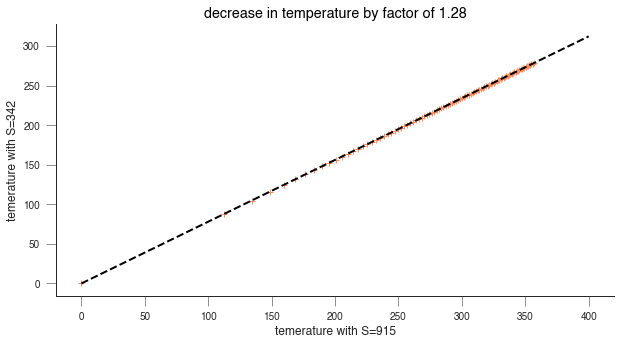

In [206]:
# illustrate this
albedo = np.arange(0.0,1.01,0.01)
temeratureOld = []

# proportionate area array
area = np.array([1.0])

# loop over the albedo values
for i,a in enumerate(albedo):
    # calculate global T for each value of albedo
    # and append to list
    temeratureOld.append(global_T(np.array([albedo[i]]),area,S=342))

plt.figure(figsize=(10,5))
# new and old temperature
plt.plot(np.array(temerature)+273,np.array(temeratureOld)+273,'+')
# slope of 1/1.28
plt.plot([0,400],[0,400/1.28],'k--')
plt.xlabel('temerature with S=915')
plt.ylabel('temerature with S=342')
plt.title('decrease in temperature by factor of 1.28')

In [214]:
msg = '''
If Daisyworld consisted of all bare ground, what would the temperature be?

From the paper, we see bare gound has an albedo of 0.5
(0.25, 0.75 for black and white daisies)
'''
print(msg)
T = global_T(np.array([0.5]),area)
print(f'temperature of bare gound = {T:.2f} C')

msg = '''
If Daisyworld consisted of all black daisies, what would the temperature be?
'''
print(msg)
T = global_T(np.array([0.25]),area)
print(f'temperature of black daisies = {T:.2f} C')

msg = '''
If Daisyworld consisted of all white daisies, what would the temperature be?
'''
print(msg)
T = global_T(np.array([0.75]),area)
print(f'temperature of white daisies = {T:.2f} C')


If Daisyworld consisted of all bare ground, what would the temperature be?

From the paper, we see bare gound has an albedo of 0.5
(0.25, 0.75 for black and white daisies)

temperature of bare gound = 26.87 C

If Daisyworld consisted of all black daisies, what would the temperature be?

temperature of black daisies = 58.86 C

If Daisyworld consisted of all white daisies, what would the temperature be?

temperature of white daisies = -20.84 C


In [216]:
msg = '''
Given that Daisies only grow in the temperature 
range 5 C to 40 C (p. 285), what are the implications of this?

A planet with all black, or all white daisies cannot survive,
the former being too hot and the latter too cold. 

If the planet is all bare ground, then daisies could survive, 
but there would be no daisies...
'''
print(msg)


Given that Daisies only grow in the temperature 
range 5 C to 40 C (p. 285), what are the implications of this?

A planet with all black, or all white daisies cannot survive,
the former being too hot and the latter too cold. 

If the planet is all bare ground, then daisies could survive, 
but there would be no daisies...



### Local temperature

Next, we define the local daisy temperature, as a function of the global temperature `Te` and a 'conduction' term `q`. If `q` is set to 0, the temperature of all daisies will be the same as the planetary mean. `q` should be set to less than $0.2 S L / \sigma$ to be physically realisable.

In [2]:
def local_T(albedo,area,Te,q):
    '''
    Function to calculate local temperature as a function
    of global effective temperature (C) Te, 'resistance' q and
    albedo contrast. We need (albedo * area).sum() to get 
    planet albedo for the contrast term.
    
    0 <= q <= 0.2 S L / sigma
    
    Returns array of local tempertures T1 (C)
    
    Inputs:
    
    albedo : float array of length n_species + 1
             (unitless, 0<=albedo<=1). The final entry is
             for bare ground.    
    area   : float array of length n_species + 1
             proportionate area of ground 
             covered by each species. The last entry 
             is for bare ground. This should
             sum to p
    Te     : float: global effective temperature (C)
    q      : float: conduction
    
    Return:
    T1     : array of local tempertures T1 (C)
     
    '''
    # T in C to K, raised to power of 4 (rhs eqn 6)
    # eqn 6
    TK4 = (Te + 273)**4
    
    # A is planetary albedo (eqn 5)
    A = (albedo * area).sum()
    # q times albedo contrast (rhs eqn 6)
    q_contrast = q * (A - albedo)
    
    # eqn 6
    T1 = np.power(q_contrast + TK4,0.25) - 273
    return T1

Before we test this, we need to set an upper limit for the resistance term `q`. This is an empirical term to provide for lateral transfer of heat energy that is otherwise lacking in the system.

    the parameter q expresses the degree to which solar energy, after having been absorbed by the planet, is redistributed amongst the three types of surface. (p. 285)

In [227]:
# get appropriate value for q
# 0 <= q <= 0.2 S L / sigma
sigma = 5.670400e-8
#S = 9.17e5 # ergs cm^-2 s^-1 
S = 917 # W m^-2
Lmin = 0.7
SLmin = S * Lmin

# so qmax would be about ...
qmax = SLmin * 0.2 / sigma

print(f'max value of q is {qmax}')

max value of q is 2264037810.383747


so, around $2.3 \times 10^9$ as a maximum value for `q`. 

Resistance is the reciprocal of conductance. 

At the lower limit, a resistance value of `q` of 0 gives infinite conductance between areas of black daisies and white daisies, so they have the same temperature (as the global temperature), at the upper limit, the temperatures of black and white daisies will be more different.

We can illustrate this by varying `q`. For a planet with 1/3 each of bare ground, black daisies and white daisies, we get a global temperature of nearly 27 C. For zero resistance, the temperature of all 

so, around $2.3 \times 10^9$ as a maximum value for `q`. 

Resistance is the reciprocal of conductance. 

At the lower limit, a resistance value of `q` of 0 gives infinite conductance between areas of black daisies and white daisies, so they have the same temperature (as the global temperature), at the upper limit, the temperatures of black and white daisies will be more different.

We can illustrate this by varying `q`. For a planet with 1/3 each of bare ground, black daisies and white daisies, we get a global temperature of nearly 27 C. For zero resistance, the temperature of all cover types is the same. But for high `q` there is a difference of nearly 10 degrees between the black and white daisies.

global; temperature 26.94 C


(0.0, 2264037810.383747)

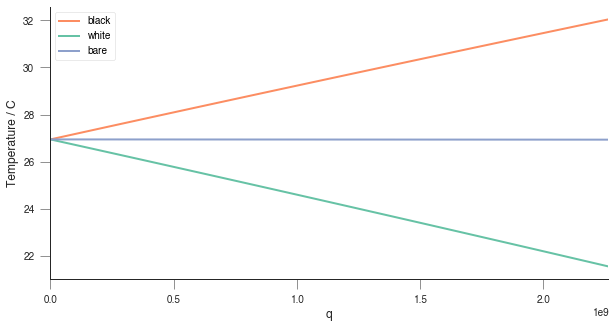

In [238]:
# set albedo for b, w and bare
albedo = np.array([0.25, 0.75, 0.5 ])
# set example areas
area   = np.array([0.333, 0.333, 0.333 ])
# global T
Te = global_T(albedo,area)    
print(f'global; temperature {Te:.2f} C')
# vary q
q = np.linspace(0,qmax,100)
T1 = []

# loop over q
for i,qi in enumerate(q):
    T1.append(local_T(albedo,area,Te,qi))
    
# convert to numpy array
T1 = np.array(T1)
# plot
plt.figure(figsize=(10,5))
plt.plot(q,T1[:,0],label='black')
plt.plot(q,T1[:,1],label='white')
plt.plot(q,T1[:,2],label='bare')
plt.legend(loc='best')
plt.xlabel('q')
plt.ylabel('Temperature / C')
plt.xlim(0,qmax)

#### Exercise

* Given equation 6 in the paper, and noting that albedo is unitless, what are the units of `q`?
* The idea of a resistance is rather artificial. What are some mechanisms that give rise to lateral transport of energy in the Earth system?

In [220]:
#### ANSWER

msg = '''
Given equation 6 in the paper, and noting that albedo is unitless, 
what are the units of `q`?

from equation 6, we can see that the q x albedo relates to T^4, 
with T in K, so q has units of K^4
'''
print(msg)


Given equation 6 in the paper, and noting that albedo is unitless, 
what are the units of `q`?

from equation 6, we can see that the q x albedo relates to T^4, 
with T in K, so q has units of K^4



In [239]:
### ANSWER

msg = '''
The idea of a resistance is rather artificial. 
What are some mechanisms that give rise to lateral transport of heat energy in the Earth system?

Lateral (sideways) transfers will generally involve sensible heat transfer
e.g. by conduction or convection. Examples would be convective energy transfer
in atmospheric or oceanic circulation systems.
'''
print(msg)


The idea of a resistance is rather artificial. 
What are some mechanisms that give rise to lateral transport of heat energy in the Earth system?

Lateral (sideways) transfers will generally involve sensible heat transfer
e.g. by conduction or convection. Examples would be convective energy transfer
in atmospheric or oceanic circulation systems.



## plant growth

In DaisyWorld, a constant death rate is assumed (`gamma`), giving the proportion of daisies that die at each time step (0.3 default value). This is again somewhat artificial, but serves the purpose of freeing up 'bare land' to allow other daisies to grow. The 'growth rate' (really, a form of birth rate) (equation 1) is made proportionate the amount of (fertile) bare land and a factor `beta` dependent on local temperature. The former limits the potential area that can be colonised and provides 'area balance' to the equations. The latter is a realistic mechanism, in that plants will tend to have optimal operating temperature ranges (5 to 40 C here) and will not establish or grow outside of such ranges. We will see in later lectures that a similar model is used in dealing with vegetation dynamics in terrestrial carbon models and as components of climate models. 

In [240]:
def growth_rate(area,T1,p=1.0,gamma=0.3):
    '''
    grow the daisies: change area occupied
    
    Use change in area wrt time (equation 1)
    to grow plant areas. Returns dArea_dt
    
    Inputs:
    
    area    : float array of length n_species + 1
              proportionate area of ground 
              covered by each species. The last entry 
              is for bare ground. This should
              sum to p
    T1      : float array of length n_species
              local temperature (C) of each species
           
    Keywords:
    
    p        : proportion of fertile ground (1.0)
    gamma    : death rate per unit of time
    
    Return:
    
    dArea_dt : float array of length n_species + 1
               rate of change of area 
    '''
    
    # covered is area of fertile ground covered 
    # by daisies. 
    covered = area[:-1].sum()
    
    # x is proportionate area of fertile ground 
    # not covered (eqn 2)
    x = np.max([0.0,p - covered])
    
    # last entry in area is proportion of 
    # area not covered
    area[-1] = np.max([0.0,1 - covered])
    
    # growth rate beta (eqn 3)
    beta = 1 - 0.003265 * (22.5 - T1)**2
    beta[beta < 0] = 0
    
    births = x * area * beta
    deaths = area * gamma
    dArea_dt = births - deaths
    # equation doesnt apply to last value
    dArea_dt[-1] = 0.0
    return dArea_dt

In [ ]:
dArea_dt = growth_rate(area,T1)

In [75]:
def time_step(i,albedo,area,Te,T1,dArea_dt,\
              p=1.0,gamma=0.3,L=1.0,S=917.0,q=0):
    '''
    move the system on one time step
    
    Inputs:
    
    i       : index for time (0 <= i < nsamp)
    albedo  : float array of length n_species + 1
              (unitless, 0<=albedo<=1). The final entry is
              for bare ground.    
 
            
    Generated:
    
    area    : float array of shape (n_species + 1,nsamp)
              proportionate area of ground 
              covered by each species. The last entry 
              in axis 0 is for bare ground. This should
              sum to p for each time step       
    Te      : float array of shape (n_species + 1)
              global temperature (C)       
    T1      : float array of shape (n_species + 1,nsamp)
              local temperature (C)  
    dArea_dt: float array of shape (n_species + 1,nsamp)
              local growth rate   
             
    Keywords:
    
    p        : proportion of fertile ground (1.0)
    gamma    : death rate per unit of time
    L        : Luminosity (unitless, 0<=L<=1)  
    S        : Solar radiation flux density (Wm^{-2})
    '''
    #
    # set and check the area variable for entry i
    # thresholds on area
    #
    area[:,i] = np.max(np.array([area[:,i],area[:,i]*0 + 0.01]),axis=0)
    area[:,i] = np.min(np.array([area[:,i],area[:,i]*0 + 1.00]),axis=0)
    # covered is area of fertile ground covered by daisies. 
    covered = area[:-1,i].sum()
    # last entry in area is proportion of area not covered
    area[-1,i] = np.max([0.0,1 - covered])
    
    # global Temperature
    Te[i] = global_T(albedo,area[:,i],L=L,S=S)
    # local temperture
    T1[:,i] = local_T(albedo,area[:,i],Te[i],q)
    # growth rate
    dArea_dt[:,i] = growth_rate(area[:,i],T1[:,i],p=p,gamma=gamma)
    dArea_dt[-1,i]= 0.0
    
    # sum the area into next entry
    try:
        area[:,i+1] = area[:,i] + dArea_dt[:,i]
        area[-1,i+1] = p - area[:-1,i+1].sum()
    except:
        pass
    return

In [223]:
# get appropriate value for q
# 0 <= q <= 0.2 S L / sigma
sigma = 5.670400e-8
#Smax = 9.17e5 # ergs cm^-2 s^-1 
Smax = 917 # W m^-2
Lmin = 0.7
SLmax = Smax * Lmax
qmax = SLmax * 0.2 / sigma

In [224]:
area   = np.array([0.1,0.1,0.98])
albedo = np.array([0.25,0.75,0.5])
q = qmax * 0.4
Te = global_T(albedo,area,L=1.0,S=Smax)
T1 = local_T(albedo,area,Te,q)
dArea_dt = growth_rate(area,T1)
print(f'Te is {Te:.2f} C')
print(f'T1 is {T1} C')
print(f'area is {area}')
print(f'dArea_dt is {dArea_dt}')

Te is 12.35 C
T1 is [19.64291959  8.72238108 14.33825921] C
area is [0.1 0.1 0.8]
dArea_dt is [0.04786785 0.00041829 0.        ]


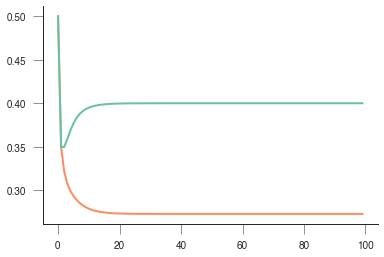

In [175]:
nsamp = 100
area     = np.zeros((albedo.shape[0],nsamp)) + 0.5
T1       = np.zeros((albedo.shape[0],nsamp))
dArea_dt = np.zeros((albedo.shape[0],nsamp))
Te       = np.zeros(nsamp)

for t in range(nsamp):
    time_step(t,albedo,area,Te,T1,dArea_dt,\
              p=1.0,gamma=0.3,L=1.0,S=Smax,q=q)
plt.plot(area[:-1].T)

[0.27307733 0.40011414 0.32680853]


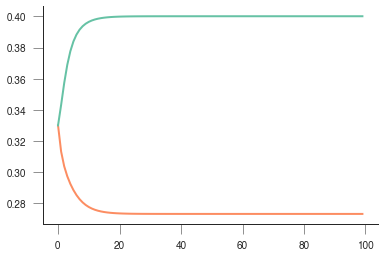

In [176]:
nsamp = 100
area     = np.zeros((albedo.shape[0],nsamp)) + 0.33
T1       = np.zeros((albedo.shape[0],nsamp))
dArea_dt = np.zeros((albedo.shape[0],nsamp))
Te       = np.zeros(nsamp)

for t in range(nsamp):
    time_step(t,albedo,area,Te,T1,dArea_dt,\
              p=1.0,gamma=0.3,L=1.0,S=Smax,q=q)
plt.plot(area[:-1].T)
print(area[:,-1])

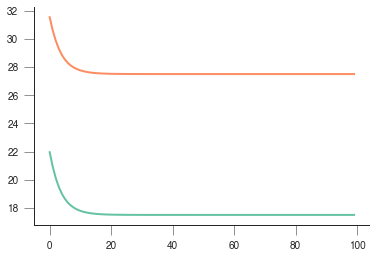

In [177]:
plt.plot(T1[:-1].T)

In [178]:
def daisy_world(L,albedo,
                niter=100,p=1.0,gamma=0.0,S=Smax,q=q):
    '''
    Run daisy world to equilibrium conditions
    
    Inputs:
    
    L       : float array of length nsamp
              Luminosity (unitless, 0<=L<=1)    
    albedo  : float array of length n_species + 1
              (unitless, 0<=albedo<=1). The final entry is
              for bare ground.     
             
    Keywords:
    
    nsamp    : n samples for steady state (default 100)
    p        : proportion of fertile ground (1.0)
    gamma    : death rate per unit of time
    S        : Solar radiation flux density (Wm^{-2})   
    
    Output:
    
    steady state values of
    
    area    : float array of shape (n_species + 1,nsamp)
              proportionate area of ground 
              covered by each species. The last entry 
              in axis 0 is for bare ground. This should
              sum to p for each time step       
    Te      : float array of shape (n_species + 1)
              global temperature (C)       
    T1      : float array of shape (n_species + 1,nsamp)
              local temperature (C)  
    dArea_dt: float array of shape (n_species + 1,nsamp)
              local growth rate   
 
    '''
    #   iarea   : float array of shape (n_species + 1)
    #          initial proportionate area of ground 
    #          covered by each species.                
    iarea = np.array([0.1,0.1,0.0])

    # results array
    area     = np.zeros((albedo.shape[0],L.shape[0]))
    Te       = np.zeros((L.shape[0],))
    T1       = np.zeros((albedo.shape[0],L.shape[0]))
    dArea_dt = np.zeros((albedo.shape[0],L.shape[0]))
    
    # arrays for generating steady state
    xarea     = np.zeros((albedo.shape[0],niter))
    xarea[:,0]= iarea
    xT1       = np.zeros((albedo.shape[0],niter))
    xdArea_dt = np.zeros((albedo.shape[0],niter))
    xTe       = np.zeros(niter)
    
    # loop over luminosity
    for i,xL in enumerate(L):
        for t in range(niter):
            time_step(t,albedo,xarea,xTe,xT1,xdArea_dt,\
                      p=1.0,gamma=0.0,L=L[i],S=Smax,q=q)
        # load up values from last (steady state) entry
        area[:,i]     = xarea[:,-1]
        Te[i]         = xTe[-1]
        T1[:,i]       = xT1[:,-1]
        dArea_dt[:,i] = xdArea_dt[:,-1]
    return area,Te,T1,dArea_dt

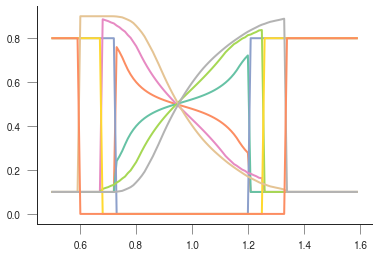

In [182]:
L = np.arange(0.5,1.6,0.01)
q = qmax * 0.4
for q in [qmax * 0.1,qmax * 0.4,qmax * 0.9]:
    area,Te,T1,dArea_dt = daisy_world(L,albedo,p=1.0,gamma=0.3,S=Smax,q=q)
    plt.plot(L,area.T)

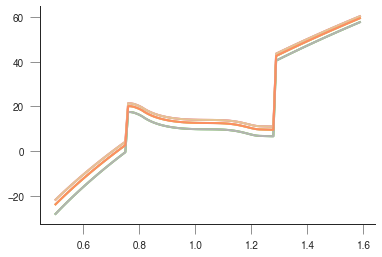

In [183]:
for q in [qmax * 0.1,qmax * 0.4,qmax * 0.9]:
    area,Te,T1,dArea_dt = daisy_world(L,albedo,p=1.0,gamma=0.3,S=Smax,q=q)
    plt.plot(L,Ti.T)

No handles with labels found to put in legend.


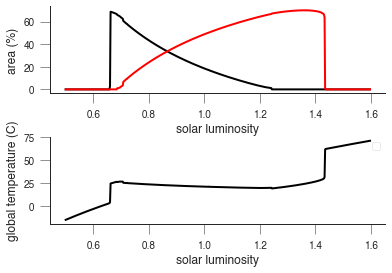

In [184]:
%run daisyworld

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def read_database(countries = None,
                    csv_file="data/nation.1751_2014.csv", 
                    url="https://cdiac.ess-dive.lbl.gov/ftp/ndp030/CSV-FILES/"):
    """Reads emissions database from local CSV file (or downloads it, 
    if not available). You can specify a list of countries to consider as well. 
    The returned Pandas data frame contains an estimate of population  
    calculated from the total emissions and per capita emission figures. The data
    are only considered after 1950"""
    csv_file = Path(f"./{csv_file:s}")

    if not csv_file.exists():
        csv_file = f"{url:s}/{csv_file:s}"

    df = pd.read_csv (csv_file, skiprows=[1,2,3],
                      parse_dates=['Year'],
                      date_parser=lambda x:pd.to_datetime(x, format='%Y'),
                     na_values="." )

    if countries is not None:
        df = df[
            (df['Year'] >= "1950-01-01")][(df['Nation'].isin(countries))]
    else:
        df = df[
            (df['Year'] >= "1950-01-01")]
        
    df.columns = ["Nation", "Year", "Total", "Solid",
                  "Liquid", "Gas", "Cement","Flaring",
                  "PerCapita", "Bunker"]
    df['PerCapita'] = df['PerCapita'].astype('float64')
    df['Population'] = 1000*df['Total'].values/df['PerCapita'].values
    return df[['Nation', "Year", "Population", "Total", "PerCapita"]]


# Read the database into a dataframe
df = read_database()
# Print the first few lines of the database
df.head()



/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


,Nation,Year,Population,Total,PerCapita
1,AFGHANISTAN,1950-01-01,inf,23,0.0
2,AFGHANISTAN,1951-01-01,inf,25,0.0
3,AFGHANISTAN,1952-01-01,inf,25,0.0
4,AFGHANISTAN,1953-01-01,inf,29,0.0
5,AFGHANISTAN,1954-01-01,inf,29,0.0


#### Questions
Identify those countries in the top twenty emitting nations lists which have increasing trends in 

1.  population and,
2. per capita emissions rates. 

Rank them in order.

You can get subset the database by sorting by the `Total` emissions field for the last year of data. The Python code that does this using Pandas is shown below. You may also want to consider the *total historical* emissions, rather than a single date, or maybe the average of the last (say) 10 years for your ranking.

```python

df[df['Year']=="2014-01-01"].sort_values("Total", ascending=False)
```

The following snippet shows you how to plot the time series of different selected countries:

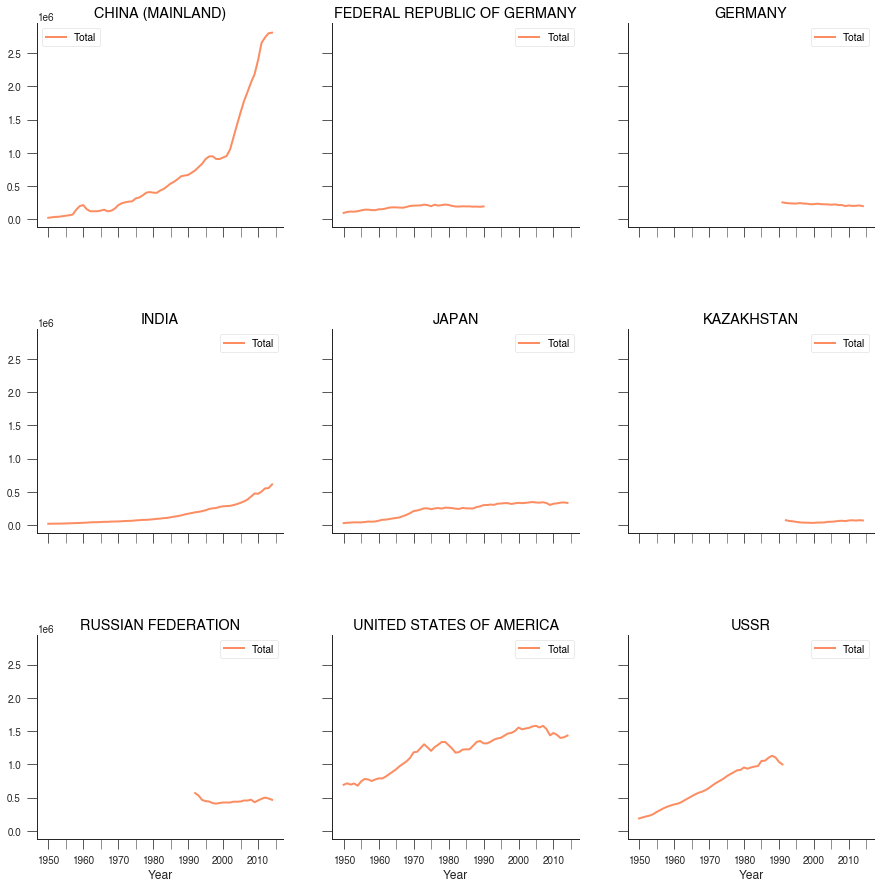

In [2]:
countries = [ "CHINA (MAINLAND)", "INDIA", "JAPAN", "FEDERAL REPUBLIC OF GERMANY",
                     "GERMANY", "USSR","KAZAKHSTAN",
                    "RUSSIAN FEDERATION", "UNITED STATES OF AMERICA"]
selected_countries_df = df[df["Nation"].isin(countries)].groupby("Nation")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                       sharex=True, sharey=True)
axs = axs.flatten()

for i, (nation_name, totals) in enumerate(selected_countries_df):
    totals.plot(ax=axs[i],
                x="Year", y="Total", title=nation_name)


## Extrapolating emissions

The code below provides linear *extrapolation* of per capita emissions for the year 2020, based on the data from 1995 to 2008. The code is given as a Python function, and you'll be expected to modify it slightly (remember to change the function name!!!). The last line shows a demonstration of how to call the function as a user

array([ 7.89010989e-03, -1.55156264e+01])

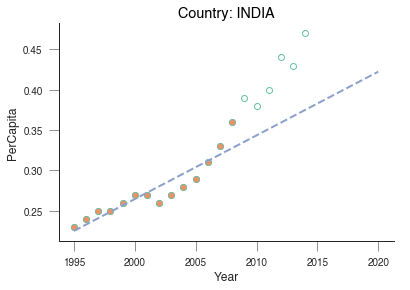

In [3]:
def fit_linear_model(df,
                     country,
                     field,
                     start_fit=1995,
                     end_fit=2008,
                     end_test=2020):
    """Fits a linear model to a particular field (given by `field`) of a given
    dataframe (`df`), where the fitting period is given.
    
    Parameters
    ------------
    df: Pandas dataframe
        A pandas dataframe. You can use the one that is available from the
        previous cells.
     country: string
         A country string. Make sure you get the country name to be the same
         as is in the database!
    field: string
        A database field, e.g. "PerCapita", "Total", etc.
    start_fit: integer
        Year where the fitting starts. By default, 1995.
    end_fit: integer
        Year where the fitting ends. By default, 2008
    end_test: integer
        Year until which you'll extrapolate your model.
        
    Returns the polynomial coefficients
    """
    start_date = f"{start_fit:d}-01-01"
    end_date = f"{end_fit:d}-01-01"
    selfit = df[(df.Year >= start_date) & (df.Year <= end_date) &
                (df.Nation == country)]
    X = selfit.Year.dt.year.values
    y = selfit[field].values
    p = np.polyfit(X, y, 1)
    plt.plot(X, y, 'o')

    testfit = df[(df.Year >= start_date) & (df.Year <= "2014-01-01") &
                 (df.Nation == country)]
    X = testfit.Year.dt.year.values
    y = testfit[field].values
    plt.plot(X, y, 'o', mfc="none")

    Xx = np.arange(start_fit, end_test + 1)

    plt.plot(Xx, np.polyval(p, Xx), '--')
    plt.title(f"Country: {country:s}")
    plt.ylabel(field)
    plt.xlabel("Year")
    return p


fit_linear_model(df, "INDIA", "PerCapita")

#### Questions
* Adapt the code so that it provides estimates of Total Fossil-Fuel Emissions for 2020 for the top 20 emitting countries, assuming population does not increase.
* Adapt the code so that it provides estimates of Total Fossil-Fuel Emissions for 2020 for the top 20 emitting countries, assuming a linear trend in population.
* Use these two sets of figures to estimate the impact of population growth on total (global) Fossil-Fuel Emissions for 2020 (i.e. what proportion of the change in estimated emissions can be attributed to population growth?). You can assume that the proportion of emissions from the top 20 countries remains at 63% if you need that information.
* What impact does the time period over which you perform the linear regression have (e.g. change it to start at 2000)?
* If you have time, you might try to estimate the uncertainty on these estimates.
* Criticise the model developed. What factors might come into play that we have not accounted for here (a starter: global economic conditions; also, have we missed any important countries)?